In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c5d2801bd7804fc3badc484ebae03cf5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kQnG75bhWmL0XLFrEsAfzrssfTtEWG-Kd6ducB_DRl9y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c5d2801bd7804fc3badc484ebae03cf5.get_object(Bucket='sahithimlproject-donotdelete-pr-8j3jcfeilfxro4',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
data = pd.read_csv(body)
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df=data.drop(['Country'],axis=1)
housing_map = {'Developing': 1, 'Developed': 0}
df['Status'] = df['Status'].map(housing_map)

In [5]:
df.dtypes

Year                                 int64
Status                               int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
df.fillna(data.mean(), inplace=True)

In [7]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [8]:
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)


x = df[['Status','Schooling','Income_Comp_Of_Resources','HIV/AIDS','Adult_Mortality','Alcohol','BMI','Infant_Deaths','Percentage_Exp','Under_Five_Deaths','Diphtheria','Measles','Tot_Exp','thinness_1to19_years','thinness_5to9_years']]
y = df['Life_Expectancy']


x.tail()

,Status,Schooling,Income_Comp_Of_Resources,HIV/AIDS,Adult_Mortality,Alcohol,BMI,Infant_Deaths,Percentage_Exp,Under_Five_Deaths,Diphtheria,Measles,Tot_Exp,thinness_1to19_years,thinness_5to9_years
2933,1,9.2,0.407,33.6,723.0,4.36,27.1,27,0.0,42,65.0,31,7.13,9.4,9.4
2934,1,9.5,0.418,36.7,715.0,4.06,26.7,26,0.0,41,68.0,998,6.52,9.8,9.9
2935,1,10.0,0.427,39.8,73.0,4.43,26.3,25,0.0,40,71.0,304,6.53,1.2,1.3
2936,1,9.8,0.427,42.1,686.0,1.72,25.9,25,0.0,39,75.0,529,6.16,1.6,1.7
2937,1,9.8,0.434,43.5,665.0,1.68,25.5,24,0.0,39,78.0,1483,7.10,11.0,11.2


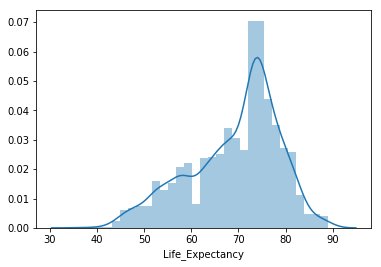

In [9]:
sns.distplot(df['Life_Expectancy'])

# Splitting the data using train_test_split()

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [18]:
x_train.head()

,Status,Schooling,Income_Comp_Of_Resources,HIV/AIDS,Adult_Mortality,Alcohol,BMI,Infant_Deaths,Percentage_Exp,Under_Five_Deaths,Diphtheria,Measles,Tot_Exp,thinness_1to19_years,thinness_5to9_years
2531,0,15.2,0.899,0.1,66.0,10.15,53.2,0,10055.349810,0,94.0,60,1.86,0.6,0.4
621,1,9.5,0.488,7.2,424.0,2.55,2.3,9,0.000000,14,41.0,2788,2.45,9.3,8.9
123,0,20.7,0.908,0.1,69.0,9.84,6.9,1,588.568371,1,92.0,70,8.57,0.7,0.6
2557,1,11.1,0.608,0.2,166.0,0.32,37.4,10,51.991923,12,96.0,1,5.98,3.7,3.7
2829,1,12.0,0.673,0.1,184.0,0.01,42.2,18,16.714063,21,99.0,0,6.49,3.0,3.1


In [19]:
x_train.shape

(1762, 15)

In [20]:
y_train.tail()

599     61.0
1599    72.9
1361    63.9
1547    79.4
863     58.5
Name: Life_Expectancy, dtype: float64

## Creating Linear Regression Model

In [43]:
model = LinearRegression()

In [44]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
y_pred = model.predict(x_test)

In [46]:
score=r2_score(y_test,y_pred)
score

0.8049703162107285

In [49]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.0252909313381173
Mean Square Error: 16.155845238069844
Root Mean Square Error: 4.019433447399004


In [50]:
!pip install watson-machine-learning-client

In [52]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [54]:
# @hidden_cell
client = WatsonMachineLearningAPIClient( wml_credentials )

In [57]:
# @hidden_cell
model_artifact =client.repository.store_model(model, meta_props=model_props)

In [58]:
# @hidden_cell
published_model_uid = client.repository.get_model_uid(model_artifact)

In [60]:
# @hidden_cell
deployment = client.deployments.create(published_model_uid, name="LifeExpectancy")



#######################################################################################

Synchronous deployment creation for uid: '752beae7-1efc-4628-b4a9-146e8cf0bd48' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='9aafb132-8440-4eaa-aba8-e1540bd1c37e'
------------------------------------------------------------------------------------------------




In [61]:
# @hidden_cell
scoring_endpoint = client.deployments.get_scoring_url(deployment)